In [1]:
from pylab import *

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

In [4]:
import pandas as pd

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


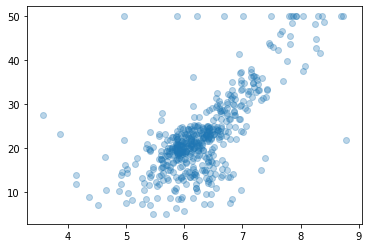

In [6]:
scatter(boston['RM'], boston['MEDV'], alpha=0.3)
show()

In [7]:
X = array(boston['RM'])
Y = array(boston['MEDV'])

In [8]:
import torch

In [9]:
print(X.shape, Y.shape)

(506,) (506,)


In [10]:
X = torch.Tensor(X.reshape(506, 1))
Y = torch.Tensor(Y.reshape(506, 1))

In [11]:
print(X.shape, Y.shape)

torch.Size([506, 1]) torch.Size([506, 1])


In [12]:
class LinearRegretion(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        
        self.F = torch.nn.Linear(input_dim, 1)
        self.loss = None
        self.accuracy = None
        
    def forward(self, x):
        return self.F(x)
    
    def fit(self, x, y, epochs=1, lr=0.01):
        loss_fn = torch.nn.MSELoss()
        optimizer = torch.optim.SGD(self.parameters(), lr=lr)
        
        self.train()
        
        for i in range(0, epochs):
            y_ = self.forward(x)
            loss = loss_fn(y_, y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        self.loss = loss.detach().numpy()
        self.accuracy = self.loss / x.shape[0]

In [13]:
h = LinearRegretion(1)

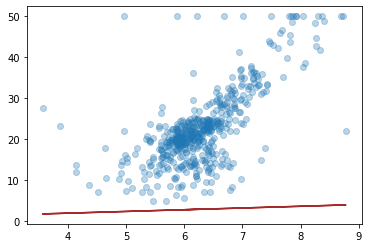

In [14]:
hy = h(X).detach()
scatter(X, Y, alpha=0.3)
plot(X, hy, c="brown")
show()

In [15]:
print(h.F.weight)

Parameter containing:
tensor([[0.4203]], requires_grad=True)


In [16]:
print(h.F.bias)

Parameter containing:
tensor([0.2636], requires_grad=True)


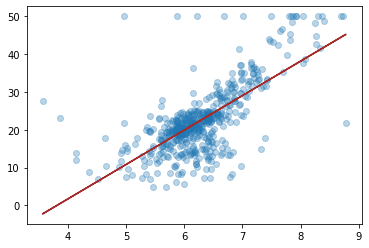

In [17]:
h.fit(X, Y, epochs=100000, lr=0.003)

hy = h(X).detach()
scatter(X, Y, alpha=0.3)
plot(X, hy, c="brown")
show()

In [18]:
for param in h.parameters():
    print(param)

Parameter containing:
tensor([[9.0979]], requires_grad=True)
Parameter containing:
tensor([-34.6439], requires_grad=True)


In [19]:
print(h.F.weight)

Parameter containing:
tensor([[9.0979]], requires_grad=True)


In [20]:
print(h.F.bias)

Parameter containing:
tensor([-34.6439], requires_grad=True)


In [21]:
print("Loss: ", h.loss)
print("Accuracy: ", h.accuracy)

Loss:  43.60056
Accuracy:  0.08616711311189554


In [22]:
print((h(torch.Tensor([6]))*1000).detach().numpy())

[19943.55]


In [23]:
print(h)

LinearRegretion(
  (F): Linear(in_features=1, out_features=1, bias=True)
)


In [24]:
print(h.state_dict())

OrderedDict([('F.weight', tensor([[9.0979]])), ('F.bias', tensor([-34.6439]))])


In [25]:
torch.save(h.state_dict(), "linear_state_dict.pt")

---

In [26]:
other_model = LinearRegretion(1)

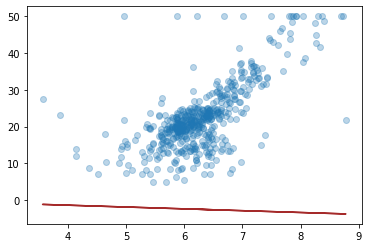

In [27]:
hy = other_model(X).detach()
scatter(X, Y, alpha=0.3)
plot(X, hy, c="brown")
show()

In [28]:
other_model.load_state_dict(torch.load("linear_state_dict.pt"))

<All keys matched successfully>

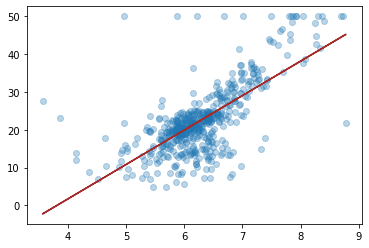

In [29]:
hy = other_model(X).detach()
scatter(X, Y, alpha=0.3)
plot(X, hy, c="brown")
show()